In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory("data")
data = data.map(lambda x, y: (x / 255, y))
train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.20)
test_size = int(len(data) * 0.10)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 3292 files belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) 
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 125, 64)      0

In [5]:
hist = model.fit(train, validation_data=val, epochs=3)

Epoch 1/3
72/72 [==============================] - 288s 4s/step - loss: 0.9785 - accuracy: 0.8767 - val_loss: 0.5740 - val_accuracy: 0.5969
Epoch 2/3
72/72 [==============================] - 292s 4s/step - loss: 0.1808 - accuracy: 0.9314 - val_loss: 0.5032 - val_accuracy: 0.9078
Epoch 3/3
72/72 [==============================] - 308s 4s/step - loss: 0.1062 - accuracy: 0.9609 - val_loss: 0.4065 - val_accuracy: 0.9266


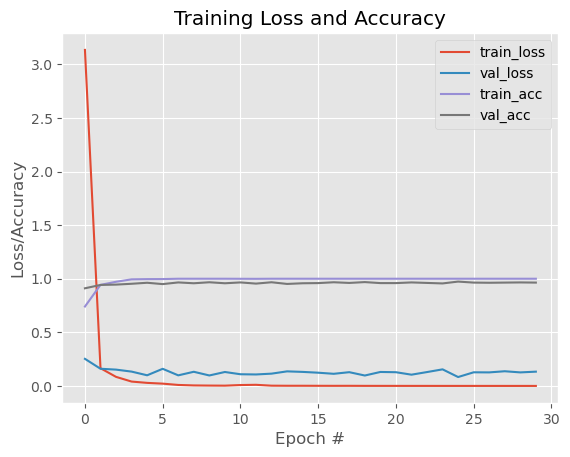

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [6]:
## evaluate
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model3.predict(x)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)
print("Precision: {:.3f}".format(pre.result().numpy()))
print("Recall: {:.3f}".format(rec.result().numpy()))
print("Accuracy: {:.3f}".format(acc.result().numpy()))

1/1 [==============================] - 1s 883ms/step
Precision: 0.888
Recall: 0.978
Accuracy: 0.919


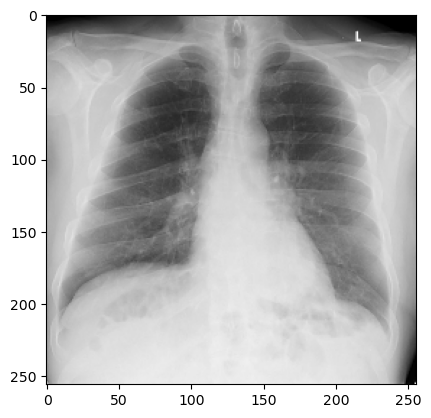

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

In [23]:
img = cv2.imread(r"hastaexmp2.jpg")
resize = cv2.resize(img, (256, 256))
plt.imshow(resize)
plt.show()
y_pred = model.predict(np.expand_dims(resize/255, axis=0))
y_pred = np.round(y_pred) # y_pred = 1 pneumonia, y_pred = 0 normal
y_pred 


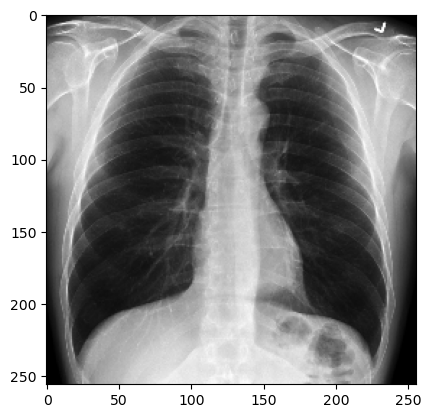

1/1 [==============================] - 0s 37ms/step


array([[0.]], dtype=float32)

In [24]:
img = cv2.imread(r"normalexmp2.jpg")
resize = cv2.resize(img, (256, 256))
plt.imshow(resize)
plt.show()
y_pred = model.predict(np.expand_dims(resize/255, axis=0))
y_pred = np.round(y_pred) # y_pred = 1 pneumonia, y_pred = 0 normal
y_pred 
